# State Data
In this problem, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to,  region the state belongs to, and two-letter abbreviation.

## Problem 1.1 - Data Exploration
We begin by exploring the data. Plot all of the states' centers with latitude on the y axis (the "y" variable in our dataset) and longitude on the x axis (the "x" variable in our dataset). The shape of the plot should look like the outline of the United States! *Note that Alaska and Hawaii have had their coordinates adjusted to appear just off of the west coast.*

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
state_data = pd.read_csv('../data/statedata.csv')
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Population      50 non-null     int64  
 1   Income          50 non-null     int64  
 2   Illiteracy      50 non-null     float64
 3   Life.Exp        50 non-null     float64
 4   Murder          50 non-null     float64
 5   HS.Grad         50 non-null     float64
 6   Frost           50 non-null     int64  
 7   Area            50 non-null     int64  
 8   state.abb       50 non-null     object 
 9   state.area      50 non-null     int64  
 10  x               50 non-null     float64
 11  y               50 non-null     float64
 12  state.division  50 non-null     object 
 13  state.name      50 non-null     object 
 14  state.region    50 non-null     object 
dtypes: float64(6), int64(5), object(4)
memory usage: 6.0+ KB


In the Python command you used to generate this plot, which variable name did you use as the first argument?
- x

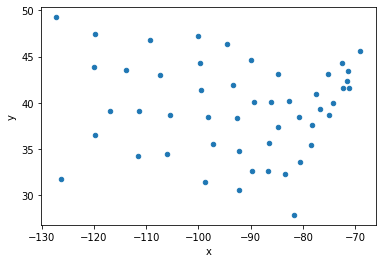

In [3]:
state_data.plot.scatter('x', 'y');

## Problem 1.2 - Data Exploration
Determine which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation rate of all the states in the region.

In [4]:
state_data.groupby('state.region')['HS.Grad'].mean()\
    .sort_values(ascending=False).head(1).round(3)

state.region
West    62.0
Name: HS.Grad, dtype: float64

## Problem 1.3 - Data Exploration
Now, make a boxplot of the murder rate by region.

Which region has the highest median murder rate?
- South

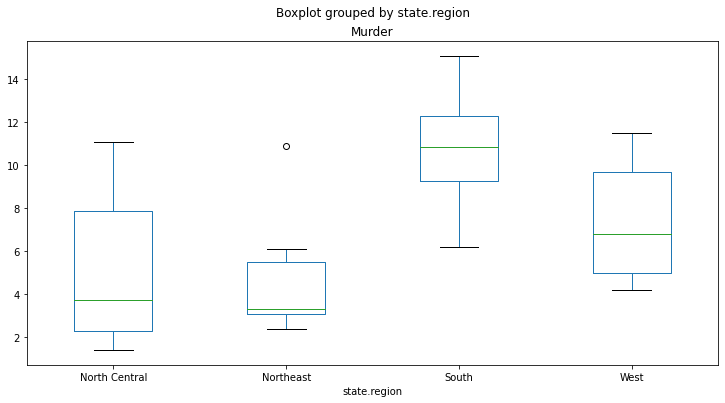

In [5]:
state_data.boxplot(column=['Murder'], by='state.region', grid=False, figsize=[12, 6]);

## Problem 1.4 - Data Exploration
You should see that there is an outlier in the Northeast region of the boxplot you just generated. Which state does this correspond to?

In [6]:
state_data[state_data['state.region']=='Northeast'][['state.name', 'Murder']]\
    .sort_values(by='Murder', ascending=False).head(1)

,state.name,Murder
31,New York,10.9


## Problem 2.1 - Predicting Life Expectancy - An Initial Model
We would like to build a model to predict life expectancy by state using the state statistics we have in our dataset.

Build the model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area). Note that you should use the variable "Area" in your model, NOT the variable "state.area".

What is the coefficient for "Income" in your linear regression model?
- -2.18e-05

In [7]:
features = ['Population', 'Income', 'Illiteracy', 'Murder', 'HS.Grad', 'Frost', 'Area']

X = state_data[features].copy()
y = state_data['Life.Exp'].copy()

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Life.Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     16.74
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.53e-10
Time:                        20:17:20   Log-Likelihood:                -51.855
No. Observations:                  50   AIC:                             119.7
Df Residuals:                      42   BIC:                             135.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.9432      1.748     40.586      0.0

## Problem 2.2 - Predicting Life Expectancy - An Initial Model
Call the coefficient for income x (the answer to Problem 2.1). What is the interpretation of the coefficient x?
- For a one unit increase in income, predicted life expectancy decreases by |x|

## Problem 2.3 - Predicting Life Expectancy - An Initial Model
Now plot a graph of life expectancy vs. income.

Visually observe the plot. What appears to be the relationship?
- Life expectancy is somewhat positively correlated with income.

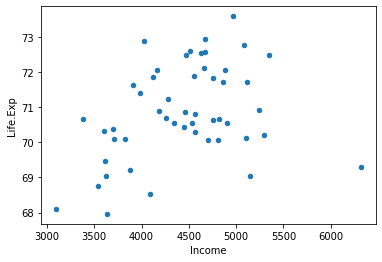

In [8]:
state_data.plot.scatter('Income', 'Life.Exp');

## Problem 2.4 - Predicting Life Expectancy - An Initial Model
The model we built does not display the relationship we saw from the plot of life expectancy vs. income. Which of the following explanations seems the most reasonable?
- Multicollinearity

## Problem 3.1 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions
Recall that we discussed the principle of simplicity: that is, a model with fewer variables is preferable to a model with many unnnecessary variables. Experiment with removing independent variables from the original model. Remember to use the significance of the coefficients to decide which variables to remove (remove the one with the largest "p-value" first, or the one with the "t value" closest to zero), and to remove them one at a time (this is called "backwards variable selection"). This is important due to multicollinearity issues - removing one insignificant variable may make another previously insignificant variable become significant.

You should be able to find a good model with only 4 independent variables, instead of the original 7. Which variables does this model contain?
- Population, Murder, Frost, HS.Grad

In [9]:
def get_summary(features):
    X_train = state_data[features]
    y_train = state_data['Life.Exp']

    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    print(model.summary())

In [10]:
features.remove('Area')
get_summary(features)

                            OLS Regression Results                            
Dep. Variable:               Life.Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     19.99
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           5.36e-11
Time:                        20:17:21   Log-Likelihood:                -51.856
No. Observations:                  50   AIC:                             117.7
Df Residuals:                      43   BIC:                             131.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.9893      1.387     51.165      0.0

In [11]:
features.remove('Illiteracy')
get_summary(features)

                            OLS Regression Results                            
Dep. Variable:               Life.Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     24.55
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.02e-11
Time:                        20:17:21   Log-Likelihood:                -51.860
No. Observations:                  50   AIC:                             115.7
Df Residuals:                      44   BIC:                             127.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.0658      1.029     69.067      0.0

In [12]:
features.remove('Income')
get_summary(features)

                            OLS Regression Results                            
Dep. Variable:               Life.Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     31.37
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.70e-12
Time:                        20:17:21   Log-Likelihood:                -51.866
No. Observations:                  50   AIC:                             113.7
Df Residuals:                      45   BIC:                             123.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.0271      0.953     74.542      0.0

## Problem 3.2 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions
Removing insignificant variables changes the Multiple R-squared value of the model. By looking at the summary output for both the initial model (all independent variables) and the simplified model (only 4 independent variables) and using what you learned in class, which of the following correctly explains the change in the Multiple R-squared value?
- We expect the "Multiple R-squared" value of the simplified model to be slightly worse than that of the initial model. It can't be better than the "Multiple R-squared" value of the initial model.

## Problem 3.3 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions
Using the simplified 4 variable model that we created, we'll now take a look at how our predictions compare to the actual values.

Take a look at the vector of predictions by using the predict function.

Which state do we predict to have the lowest life expectancy? *(Hint: use the sort function)*
- Alabama

Which state actually has the lowest life expectancy? (Hint: use the which.min function)
- South Carolina

In [13]:
X_simple = state_data[features]
y_simple = state_data['Life.Exp']

simple_model = sm.OLS(y_simple, sm.add_constant(X_simple)).fit()
y_pred_simple = simple_model.predict(sm.add_constant(X_simple))

min_index = y_pred_simple.sort_values().head(1).index
state_data.loc[min_index, 'state.name']

0    Alabama
Name: state.name, dtype: object

In [14]:
state_data[['state.name', 'Life.Exp']].sort_values(by='Life.Exp').head(1)

,state.name,Life.Exp
39,South Carolina,67.96


## Problem 3.4 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions
Which state do we predict to have the highest life expectancy?
- 

Which state actually has the highest life expectancy?
-

In [15]:
max_index = y_pred_simple.sort_values().tail(1).index
state_data.loc[max_index, 'state.name']

46    Washington
Name: state.name, dtype: object

In [16]:
state_data[['state.name', 'Life.Exp']].sort_values(by='Life.Exp').tail(1)

,state.name,Life.Exp
10,Hawaii,73.6


## Problem 3.5 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions
Take a look at the vector of residuals (the difference between the predicted and actual values).

For which state do we make the smallest absolute error?
- Indiana

For which state do we make the largest absolute error?
- Hawaii

In [17]:
min_residue_index = np.abs(y_simple - y_pred_simple).sort_values().head(1).index
state_data.loc[min_residue_index, 'state.name']

13    Indiana
Name: state.name, dtype: object

In [18]:
max_residue_index = (y_simple - y_pred_simple).sort_values().tail(1).index
state_data.loc[max_residue_index, 'state.name']

10    Hawaii
Name: state.name, dtype: object